### Feature analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Datasets/new.csv")

In [3]:
df = df.drop('Unnamed: 0',axis=1)

In [4]:
df

,id,hospital_length_of_stay,age,sex,height,weight,smoking_history,previous_er_visit_within_14_days,admission_disposition,Hypertension,...,Respiractin,Immunity Advance,Vesicare,Zaxine,Quinine Sulfate,Desvenlafaxine,Glucosamine,Turmeric,Cogentin Tab,Elavil
0,1,21,74,1,166.921591,80.232471,0.0,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,5,61,0,154.900000,73.600000,0.0,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,7,58,0,166.921591,80.232471,0.0,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,9,94,1,182.800000,66.200000,0.0,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,9,91,1,166.921591,80.232471,1.0,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,512,2,72,1,158.000000,73.800000,0.0,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
488,513,4,57,1,166.921591,80.232471,1.0,1,1,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
489,514,2,68,0,164.000000,77.100000,0.0,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
490,515,13,56,0,165.000000,72.600000,0.0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


#### Analysis of the column hospital length of stay

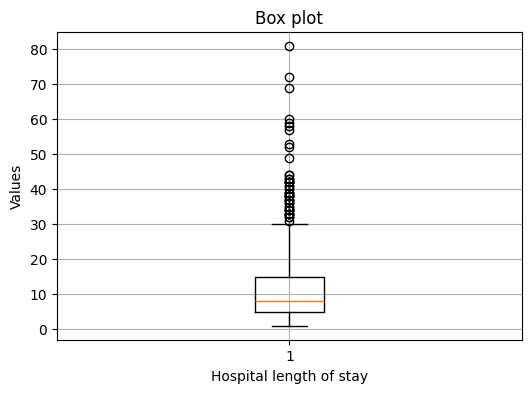

In [5]:
# Create a box plot
plt.figure(figsize=(6, 4))
plt.boxplot(df['hospital_length_of_stay'])
plt.title('Box plot')
plt.xlabel('Hospital length of stay')
plt.ylabel('Values')
plt.grid(True)
plt.show()

/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


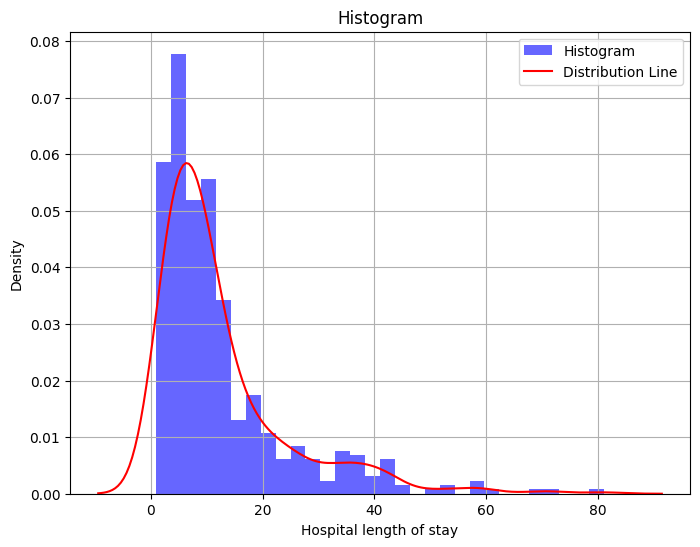

In [6]:
plt.figure(figsize=(8, 6))
plt.hist(df['hospital_length_of_stay'], bins=30, density=True, alpha=0.6, color='blue', label='Histogram')
sns.kdeplot(df['hospital_length_of_stay'], color='red', label='Distribution Line')
plt.title('Histogram')
plt.xlabel('Hospital length of stay')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


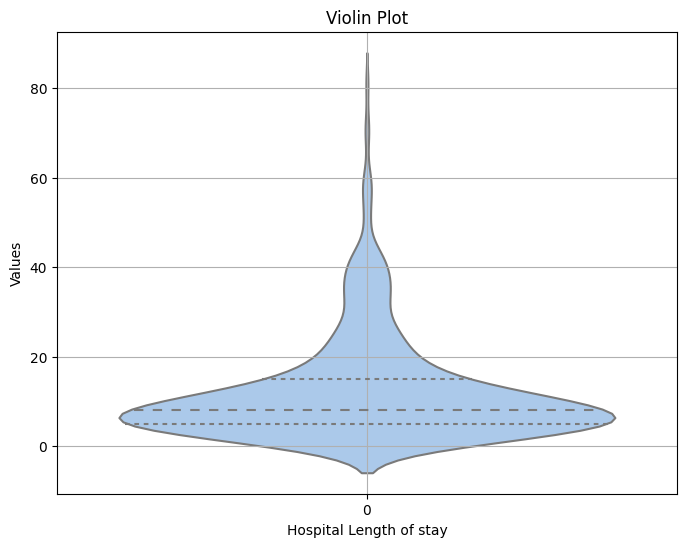

In [7]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=df['hospital_length_of_stay'], inner="quartile", palette="pastel")
plt.title('Violin Plot')
plt.xlabel('Hospital Length of stay')
plt.ylabel('Values')
plt.grid(True)
plt.show()


In [8]:
from scipy.stats import skew,kurtosis

skewness_scipy = skew(df['hospital_length_of_stay'])
kurtosis_result = kurtosis(df['hospital_length_of_stay'])
print("Skewness:",skewness_scipy)
print("Kurtosis",kurtosis_result)

Skewness: 2.1829395394511106
Kurtosis 5.769417323040647


### Filtering the dataset according to the 

In [9]:
df_20_30 = df[(df['hospital_length_of_stay'] > 20) & (df['hospital_length_of_stay'] < 30)]
df_30_40 = df[(df['hospital_length_of_stay'] >= 30) & (df['hospital_length_of_stay'] < 40)]
df_40_50 = df[(df['hospital_length_of_stay'] >= 40) & (df['hospital_length_of_stay'] < 50)]
df_50_60 = df[(df['hospital_length_of_stay'] >= 50) & (df['hospital_length_of_stay'] < 60)]
df_60_70 = df[(df['hospital_length_of_stay'] >= 60) & (df['hospital_length_of_stay'] < 70)]
df_70_80 = df[(df['hospital_length_of_stay'] >= 70) & (df['hospital_length_of_stay'] < 80)]

### Filtering out the columns if there are only 0 in the whole column

In [10]:
df_20_30 = df_20_30.loc[:, (df_20_30 != 0).any()]
df_30_40 = df_30_40.loc[:, (df_30_40 != 0).any()]
df_40_50 = df_40_50.loc[:, (df_40_50 != 0).any()]
df_50_60 = df_50_60.loc[:, (df_50_60 != 0).any()]
df_60_70 = df_60_70.loc[:, (df_60_70 != 0).any()]
df_70_80 = df_70_80.loc[:, (df_70_80 != 0).any()]

In [14]:
df_20_30.to_csv("Datasets/hospital_length_of_stay/20-30.csv")

In [15]:
df_30_40.to_csv("Datasets/hospital_length_of_stay/30-40.csv")

In [16]:
df_40_50.to_csv("Datasets/hospital_length_of_stay/40-50.csv")

In [17]:
df_50_60.to_csv("Datasets/hospital_length_of_stay/50-60.csv")

In [18]:
df_60_70.to_csv("Datasets/hospital_length_of_stay/60-70.csv")

In [19]:
df_70_80.to_csv("Datasets/hospital_length_of_stay/70-80.csv")

In [20]:
df_20_30

,id,hospital_length_of_stay,age,sex,height,weight,smoking_history,previous_er_visit_within_14_days,admission_disposition,Hypertension,...,Plendil,Sodium Bicarbonate,Insulin Lantus,Cinacalcet,Humulin,Renagel,Decadron,Aprepitant,Cranberry Fruit Concentrate,Duotrav Pq
0,1,21,74,1,166.921591,80.232471,0.0,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,10,29,66,0,145.000000,53.200000,1.0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59,60,23,72,1,166.921591,113.600000,0.0,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
80,81,22,73,1,167.600000,66.200000,0.0,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,100,25,31,1,177.000000,130.000000,0.0,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100,103,22,55,0,166.921591,80.232471,0.0,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101,104,22,56,0,157.500000,56.700000,0.0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
158,167,25,36,1,166.921591,80.232471,0.0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
177,188,24,74,0,166.921591,80.232471,0.0,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
187,198,23,60,1,190.000000,95.600000,0.0,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
df_30_40

,id,hospital_length_of_stay,age,sex,height,weight,smoking_history,previous_er_visit_within_14_days,admission_disposition,Hypertension,...,Micardis Plus,Tylenol With Codeine No 2,Stalevo,Diltiazem Xc,Zantac Tab,Neurontin,Solystat,Calcium Sandoz Forte,Onglyza,Oxycodoneacetaminophen
5,6,32,44,1,177.000000,112.000000,0.0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,13,33,86,1,166.921591,80.232471,0.0,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,14,34,91,0,165.000000,74.000000,0.0,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37,38,34,52,1,166.921591,80.232471,0.0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39,40,38,73,1,172.000000,67.400000,0.0,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48,49,38,68,1,166.921591,80.232471,0.0,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
79,80,38,82,1,166.921591,80.232471,0.0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87,90,39,69,0,125.000000,49.000000,0.0,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
92,95,38,76,1,166.921591,80.232471,0.0,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
109,112,30,68,1,166.921591,80.232471,0.0,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
df_40_50

,id,hospital_length_of_stay,age,sex,height,weight,smoking_history,previous_er_visit_within_14_days,admission_disposition,Hypertension,...,Tegretol,Quetiapine,Methylprednisolone Acetate Sus,Vitamin C,Salbutamol,Zithromax,Toradol,Methadone,Dexilant,Eligard
46,47,40,53,0,166.921591,72.600000,0.0,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116,119,42,89,1,166.921591,80.232471,0.0,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
218,233,41,65,1,166.921591,80.232471,1.0,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
227,244,42,44,1,180.000000,110.000000,0.0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
255,272,43,93,1,166.921591,80.232471,0.0,1,1,1,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
275,292,42,56,1,166.921591,80.232471,0.0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
285,302,42,95,1,166.921591,60.000000,0.0,1,1,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
294,311,41,56,1,180.000000,80.000000,0.0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
297,314,44,47,1,185.400000,74.800000,0.0,0,1,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
299,316,43,90,0,157.500000,53.000000,0.0,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [23]:
df_50_60

,id,hospital_length_of_stay,age,sex,height,weight,smoking_history,previous_er_visit_within_14_days,admission_disposition,Hypertension,...,Lyrica,Omnaris,Flovent Inhalersaem Inhorlactuation,Lantus Solosstar,Aldactone,Ergocalciferol,Ventolin,Quetiapine,Rebeprazole,Diamicron
85,88,58,70,0,166.921591,80.232471,0.0,0,1,1,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
156,165,57,68,0,166.921591,80.232471,0.0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
165,176,59,48,0,166.921591,80.232471,0.0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
240,257,53,77,1,166.921591,80.232471,1.0,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
345,366,52,79,1,166.921591,64.100000,0.0,0,1,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0


In [24]:
df_60_70

,id,hospital_length_of_stay,age,sex,height,weight,smoking_history,previous_er_visit_within_14_days,admission_disposition,Chronic cardiac disease (not hypertension),...,Escitalopram,Ativan Tab,Lipitor,Avodart,Cymbalta,Phenylephrine Hydrochloride,Vit D 3,Exetimibe,Neupro,Atacand Tab
292,309,60,40,0,166.921591,80.232471,0.0,0,1,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
328,349,69,82,1,166.921591,80.232471,1.0,1,1,1,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0


In [25]:
len(df_60_70.columns)

31

In [26]:
df_70_80

,id,hospital_length_of_stay,age,sex,height,weight,admission_disposition,History of cancer [now in remission],Other,reason_for_admission_COVID-19 [U07.1],Duloxetine,Tamsulosin
23,24,72,62,1,177.0,86.2,1,1,1,1,1.0,1.0


In [20]:
len(df_70_80.columns)

17

In [24]:
print("20-30:",df_20_30['age'].mean())
print("30-40:",df_30_40['age'].mean())
print("40-50:",df_40_50['age'].mean())
print("50-60:",df_50_60['age'].mean())
print("60-70:",df_60_70['age'].mean())
print("70-80:",df_70_80['age'].mean())

20-30: 64.80555555555556
30-40: 69.4074074074074
40-50: 71.83333333333333
50-60: 68.4
60-70: 61.0
70-80: 62.0


In [33]:
print(df_20_30['sex'].value_counts())
print(df_30_40['sex'].value_counts())
print(df_40_50['sex'].value_counts())
print(df_50_60['sex'].value_counts())
print(df_60_70['sex'].value_counts())
print(df_70_80['sex'].value_counts())

sex
0    20
1    16
Name: count, dtype: int64
sex
1    17
0    10
Name: count, dtype: int64
sex
1    9
0    3
Name: count, dtype: int64
sex
0    3
1    2
Name: count, dtype: int64
sex
0    1
1    1
Name: count, dtype: int64
sex
1    1
Name: count, dtype: int64


In [32]:
print(df_20_30['smoking_history'].value_counts())
print(df_30_40['smoking_history'].value_counts())
print(df_40_50['smoking_history'].value_counts())
print(df_50_60['smoking_history'].value_counts())
print(df_60_70['smoking_history'].value_counts())
# print(df_70_80['smoking_history'].value_counts())

smoking_history
0.0    33
1.0     3
Name: count, dtype: int64
smoking_history
0.0    23
1.0     4
Name: count, dtype: int64
smoking_history
0.0    11
1.0     1
Name: count, dtype: int64
smoking_history
0.0    4
1.0    1
Name: count, dtype: int64
smoking_history
0.0    1
1.0    1
Name: count, dtype: int64
